In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Задача 1

Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы

### 1.1. Скачать данные по ссылке https://www.kaggle.com/datasets/ionaskel/laptop-prices

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### 1.2 Изучите стоимости недвижимости

In [4]:
def cut(num):
    return num // 1000

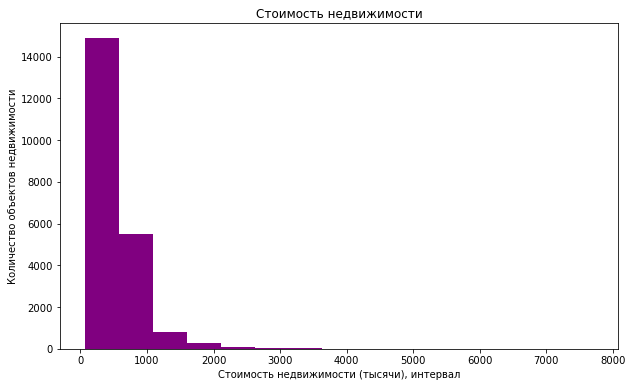

In [5]:
plt.figure(figsize = (10, 6))

plt.hist(df['price'].apply(cut), bins = 15, color='purple')

plt.title('Стоимость недвижимости')
plt.xlabel('Стоимость недвижимости (тысячи), интервал')
plt.ylabel('Количество объектов недвижимости');

### 1.3 Изучите распределение квадратуры жилой площади

In [6]:
df['sqft_living'].agg(['min', 'max'])

min      290
max    13540
Name: sqft_living, dtype: int64

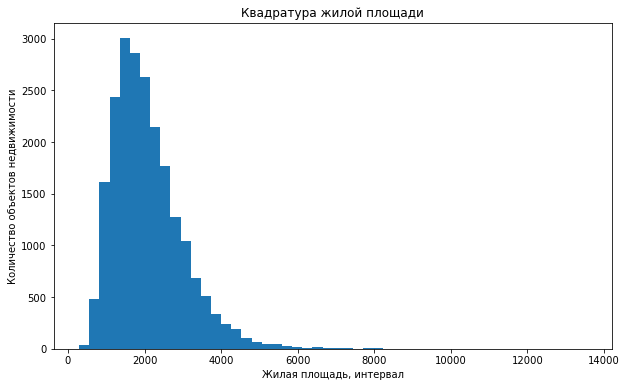

In [7]:
plt.figure(figsize = (10, 6))

plt.hist(df['sqft_living'], bins = 50)

plt.title('Квадратура жилой площади')
plt.xlabel('Жилая площадь, интервал')
plt.ylabel('Количество объектов недвижимости');

### 1.4 Изучите распределение года постройки

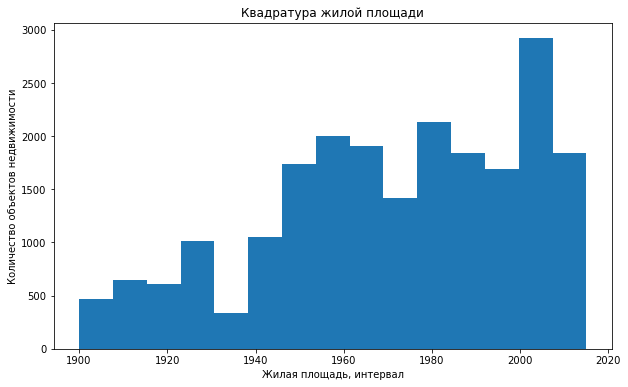

In [8]:
plt.figure(figsize = (10, 6))

plt.hist(df['yr_built'], bins = 15)

plt.title('Квадратура жилой площади')
plt.xlabel('Жилая площадь, интервал')
plt.ylabel('Количество объектов недвижимости');

## Задача 2

### 2.1 Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы

In [9]:
data = df['waterfront'].value_counts().reset_index()
data['index'] = ['no', 'yes']

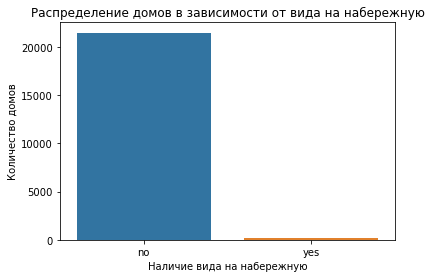

In [10]:
plt.figure(figsize=(6,4))

sns.barplot(x = data['index'], y = data['waterfront'])
plt.title('Распределение домов в зависимости от вида на набережную')
plt.xlabel('Наличие вида на набережную')
plt.ylabel('Количество домов');

In [11]:
data = df['waterfront'].value_counts()
data.index = ['no', 'yes']

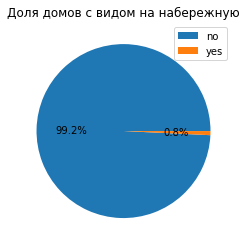

In [12]:
plt.figure(figsize=(6, 4))

plt.pie(data, autopct='%1.1f%%')

plt.title('Доля домов с видом на набережную')
plt.legend(data.index);

### 2.2 Изучите распределение этажей домов

In [13]:
df['floors'] = df['floors'].astype('int')

In [14]:
data = df['floors'].value_counts().reset_index()

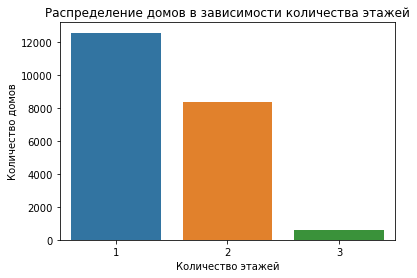

In [15]:
plt.figure(figsize=(6,4))

sns.barplot(x = data['index'], y = data['floors'])
plt.title('Распределение домов в зависимости количества этажей')
plt.xlabel('Количество этажей')
plt.ylabel('Количество домов');

In [16]:
data = df['floors'].value_counts()

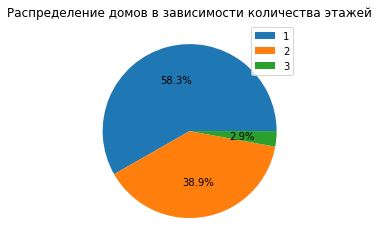

In [17]:
plt.figure(figsize=(6,4))

plt.pie(data, autopct='%1.1f%%')
plt.title('Распределение домов в зависимости количества этажей')
plt.legend(data.index);

### 2.3 Изучите распределение состояния домов

In [18]:
data = df['condition'].value_counts().reset_index()
data

,index,condition
0,3,14031
1,4,5679
2,5,1701
3,2,172
4,1,30


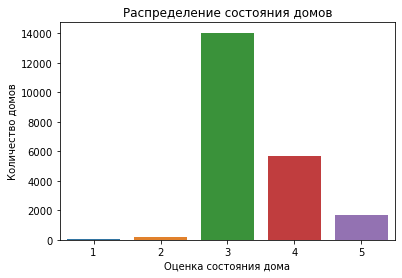

In [19]:
plt.figure(figsize=(6,4))

sns.barplot(x = data['index'], y = data['condition'])

plt.title('Распределение состояния домов')
plt.xlabel('Оценка состояния дома')
plt.ylabel('Количество домов');

In [20]:
 from sklearn.utils import shuffle

In [21]:
data = shuffle(df['condition'].value_counts())

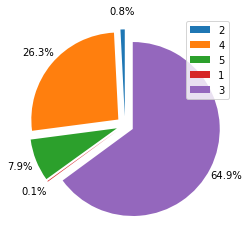

In [22]:
plt.figure(figsize=(6,4))
explode = [0.1, 0.1, 0.1, 0.1, 0.1]

plt.pie(data, autopct='%1.1f%%',pctdistance=1.2, explode=explode, startangle=90)
plt.legend(data.index);

## Задача 3

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

#### Соотношения характеристик

In [23]:
import numpy as np

In [24]:
corr_matrix = df.corr()
corr_matrix= np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix)< 0.3]= 0

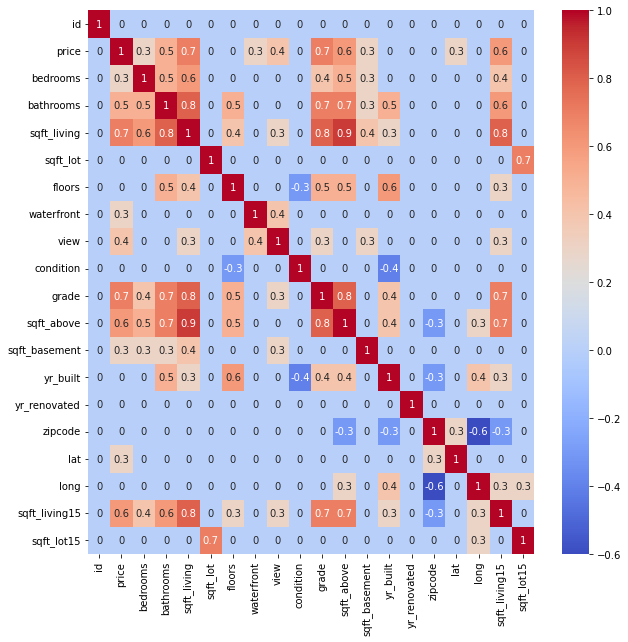

In [25]:
plt.figure(figsize=(10,10))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm');

На стоимость влияют характеристики:
1. Количество спален (bedrooms)
2. Жилая площадь (sqft_living)
3. Общая площадь надземной части дома (sqft_above)
3. Оценка дома

Интересно, но на стоимости дома никак не сказываются такие показатели, как:
1. Год постройки
2. Год реновации (ремонта)

_**Ниже проверка на отдельных графиках.**_

Особого влияния не оказывает и наличие подвала.

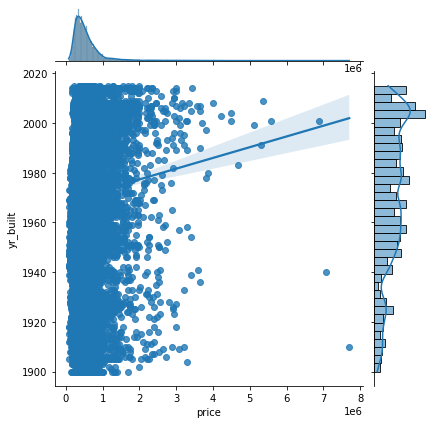

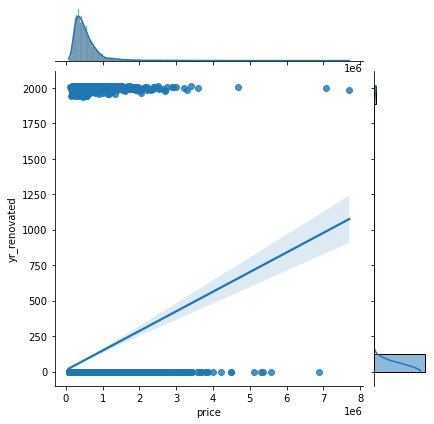

In [26]:
sns.jointplot(x = df['price'], y = df['yr_built'], kind = 'reg')
sns.jointplot(x = df['price'], y = df['yr_renovated'], kind = 'reg');

_Никаких завистимостей тут нет._

Незначительное влияние оказывают:
1. Хороший вид из окон
2. Вид на набережную

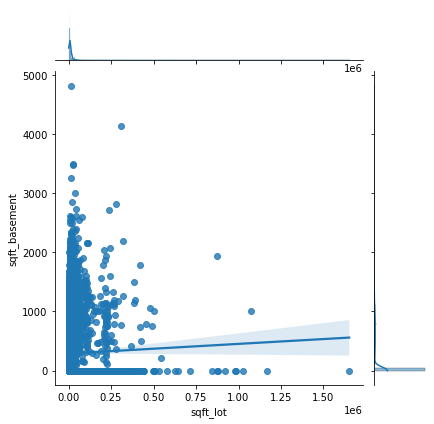

In [27]:
sns.jointplot(x = df['sqft_lot'], y = df['sqft_basement'], kind = 'reg');

Наличие подвала не оказывает влияния на стоимость недвижимости, потому что он не влияет и на общую площадь дома. Скорее всего если в доме и наличествует подвал, то его площадь слишком мала, чтобы привести к значительному повышению цены.

#### Анализ стоимости по расположению дома

In [28]:
from keplergl import KeplerGl

In [29]:
map_= KeplerGl(height=700)
map_.add_data(df)
map_.save_to_html(file_name='./map.html')

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to ./map.html!


Самые дорогие дома находятся:
1. У водоемов внутри города
2. В центрах административных районов
3. На побережье в отдалении от городского порта

Самые дешевые дома находятся:
1. У городского порта
2. На окраинах